In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

# Print column names to debug
for col in data.columns:
    print('Column:', col, '\t', data[col].dtype)
    print(data[col].unique())
    print()    

Column: customerID 	 object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender 	 object
['Female' 'Male']

Column: SeniorCitizen 	 int64
[0 1]

Column: Partner 	 object
['Yes' 'No']

Column: Dependents 	 object
['No' 'Yes']

Column: tenure 	 int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService 	 object
['No' 'Yes']

Column: MultipleLines 	 object
['No phone service' 'No' 'Yes']

Column: InternetService 	 object
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity 	 object
['No' 'Yes' 'No internet service']

Column: OnlineBackup 	 object
['Yes' 'No' 'No internet service']

Column: DeviceProtection 	 object
['No' 'Yes' 'No internet service']

Column: TechSupport 	 object
['No' 'Yes' 'No internet service']

Column: StreamingTV 	 object
['No' 'Yes

In [10]:
categorical_columns = ['InternetService', 'OnlineSecurity', 'MultipleLines',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
two_value_columns = ['gender']

columns = list(set(categorical_columns).union(yes_no_columns, two_value_columns))

print(columns)

# SeniorCitizen is already 0/1.

['StreamingMovies', 'gender', 'DeviceProtection', 'Dependents', 'OnlineBackup', 'Partner', 'PhoneService', 'InternetService', 'MultipleLines', 'Contract', 'TechSupport', 'PaperlessBilling', 'StreamingTV', 'PaymentMethod', 'OnlineSecurity']


In [11]:
# Display basic information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

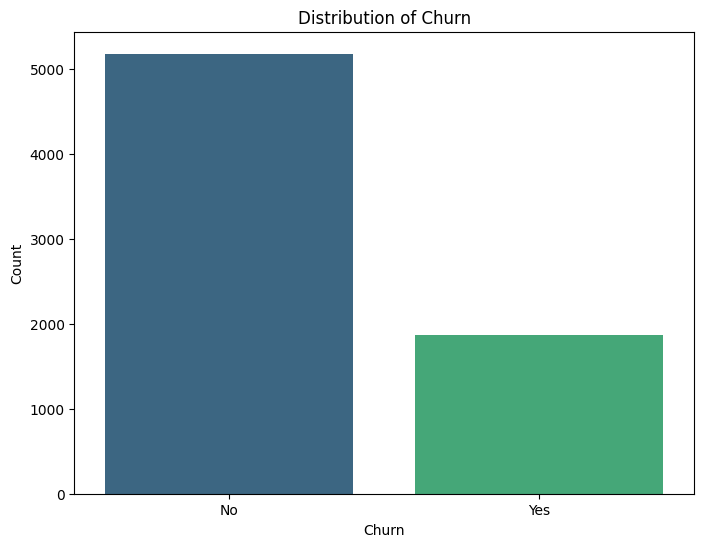

In [12]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

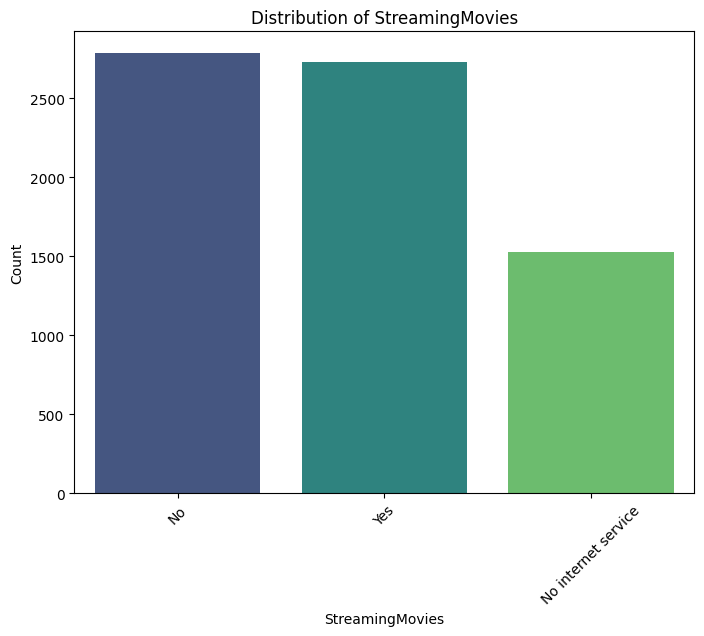

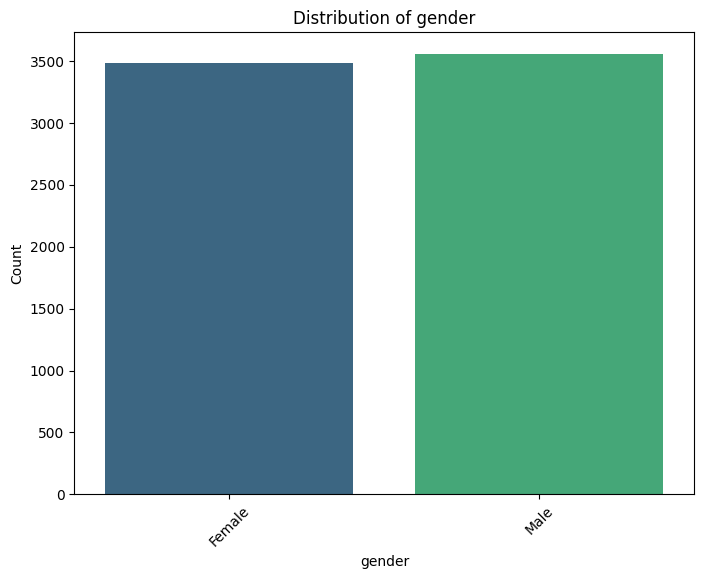

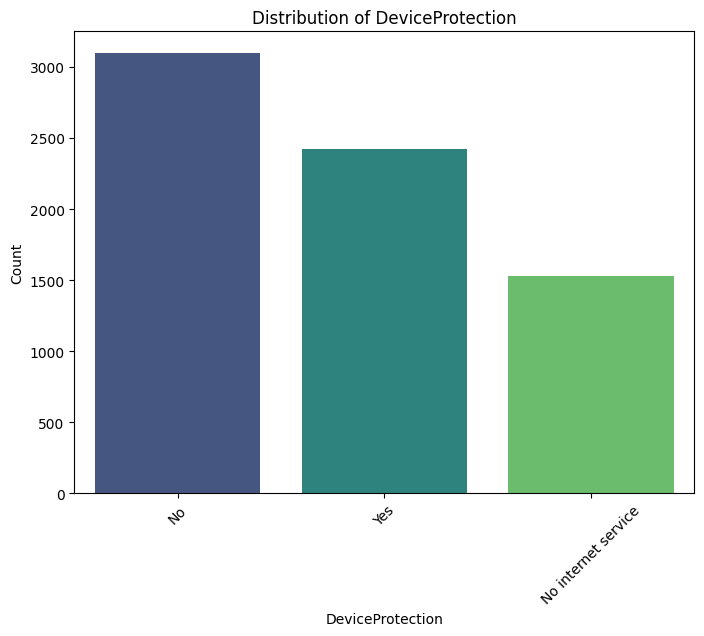

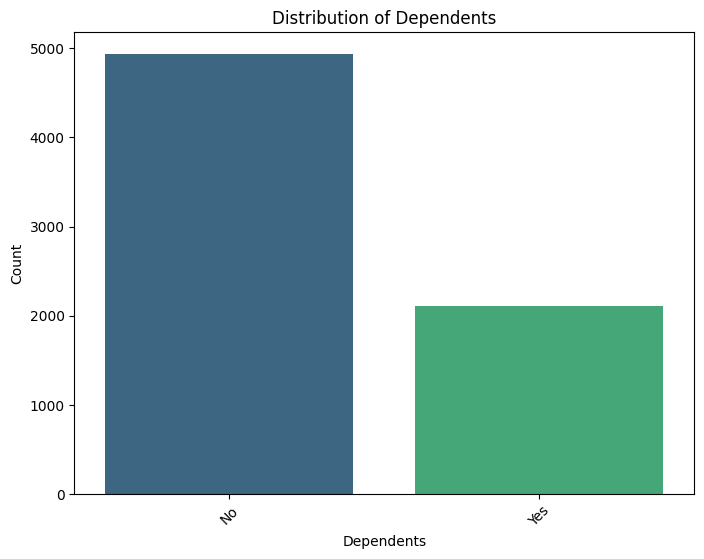

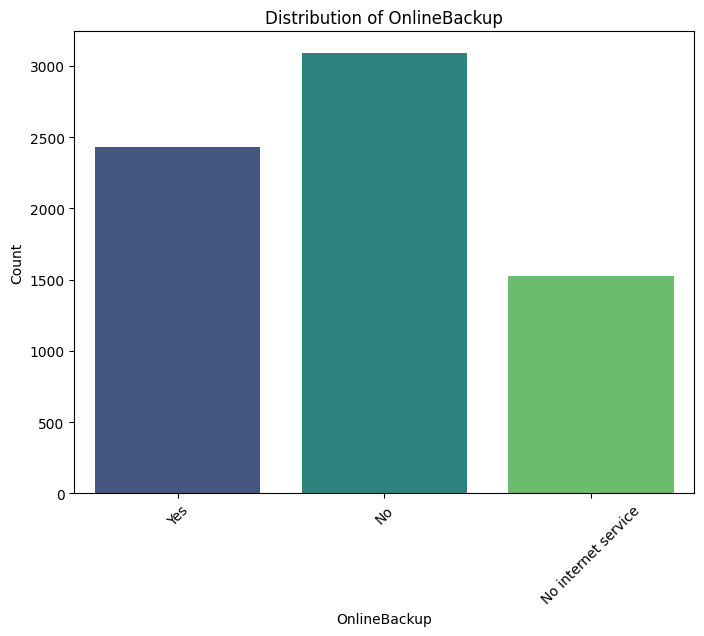

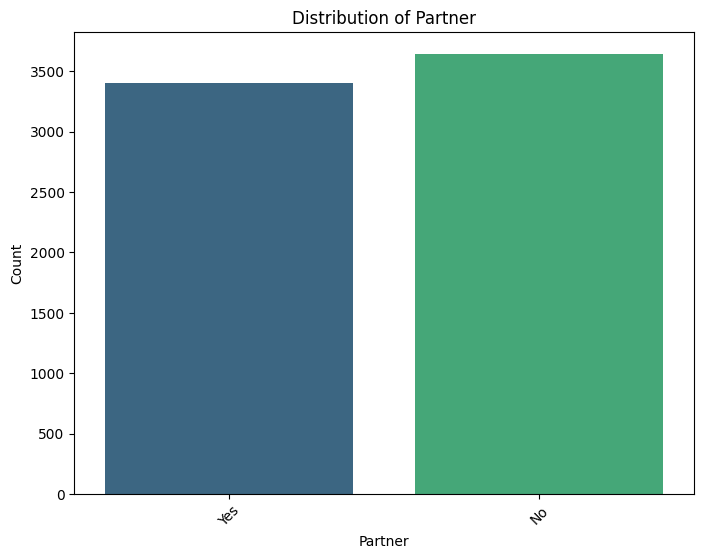

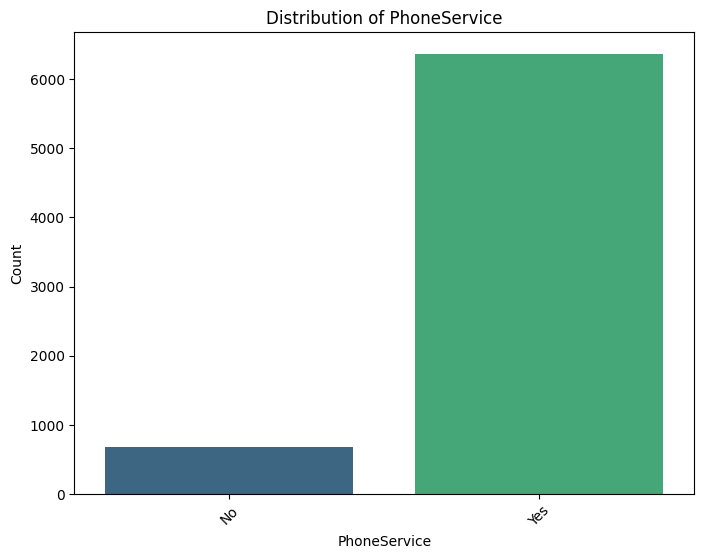

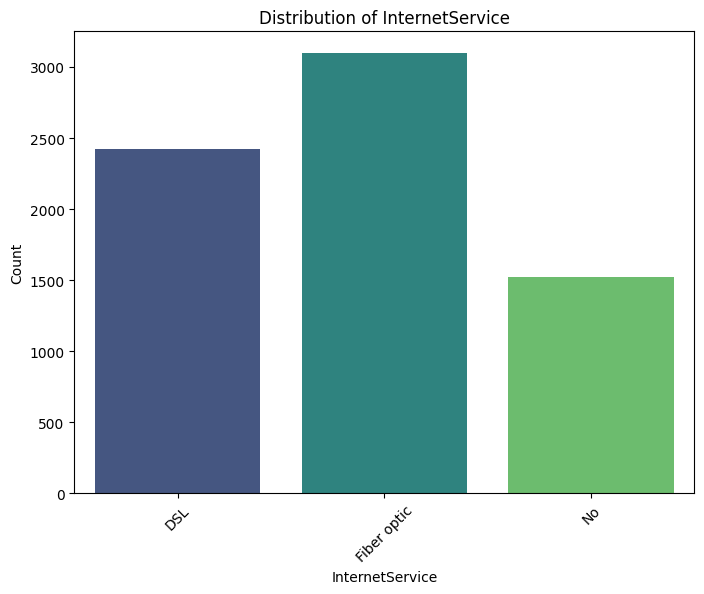

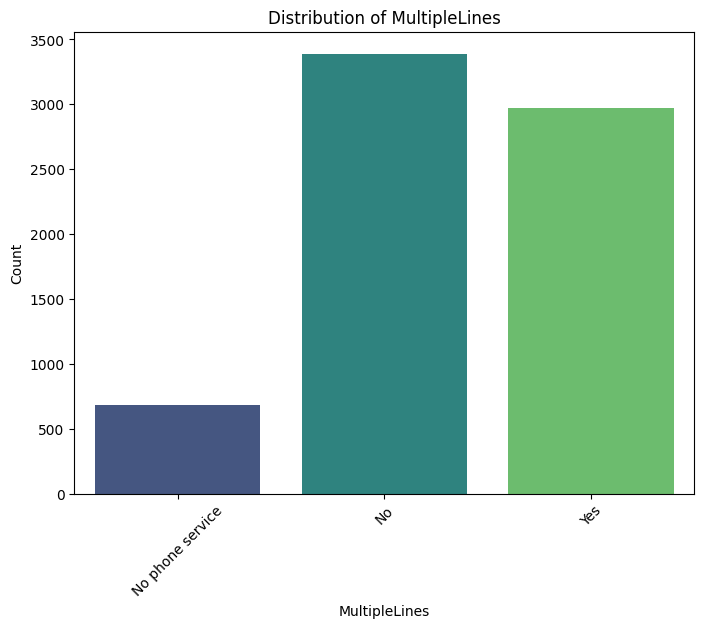

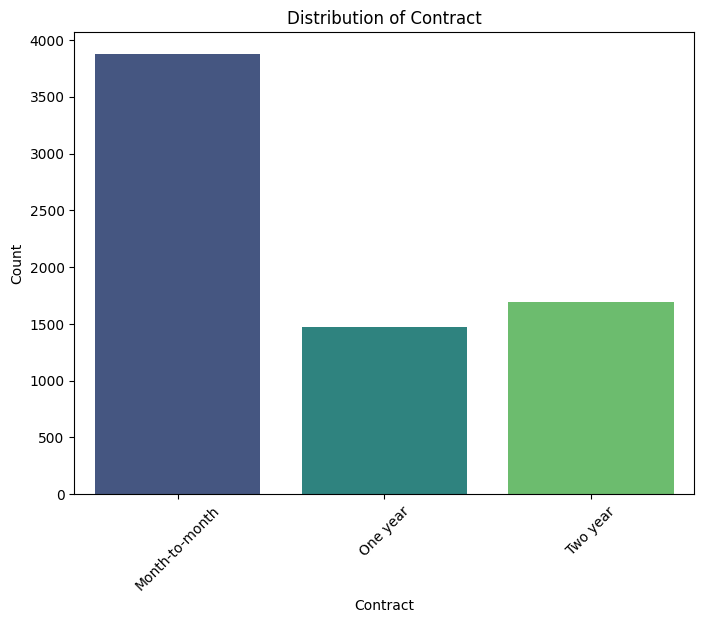

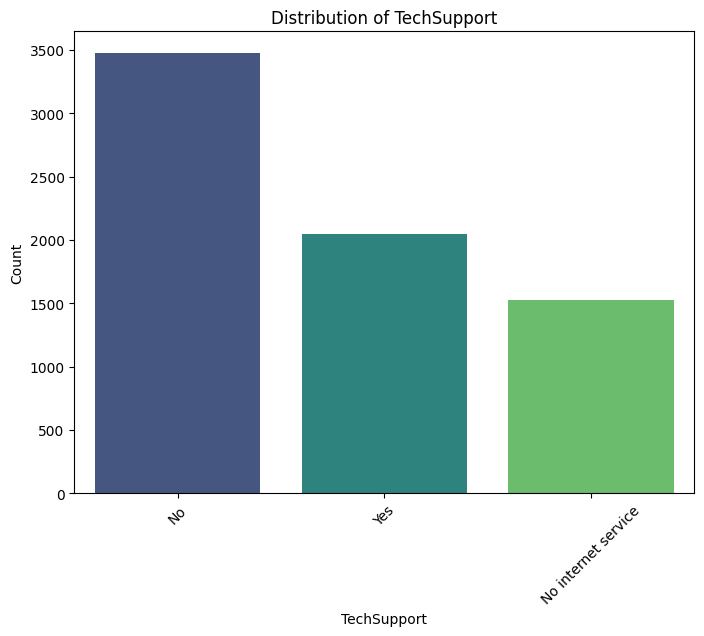

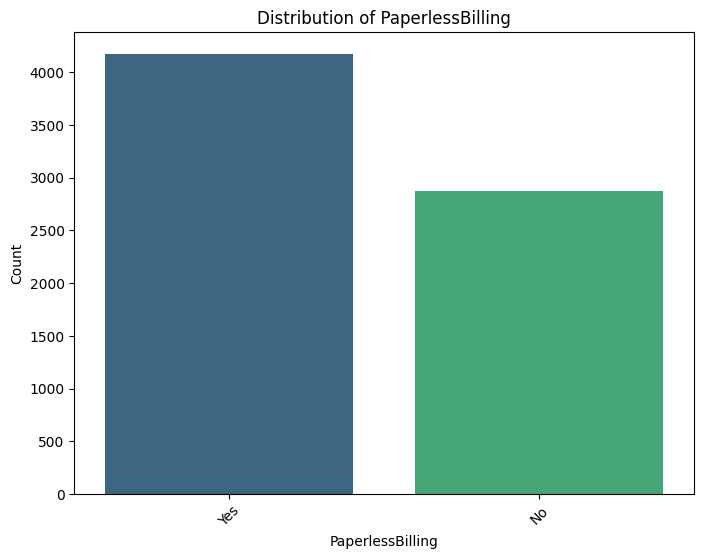

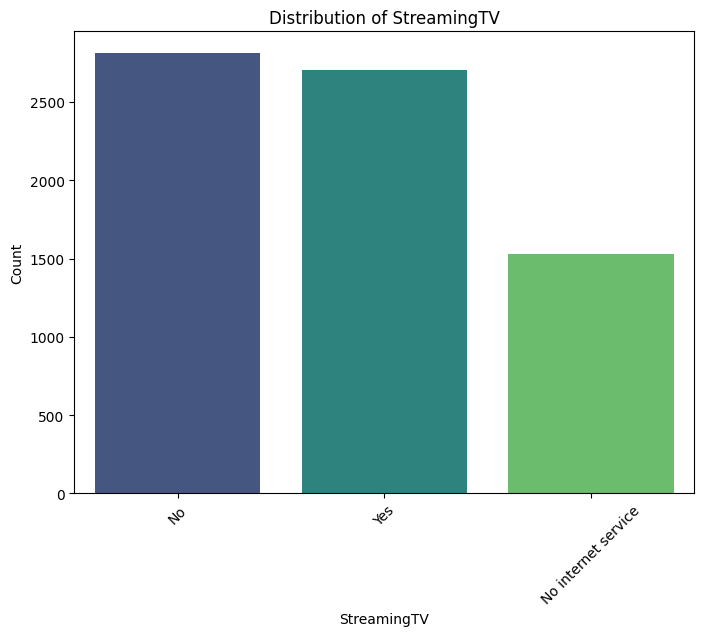

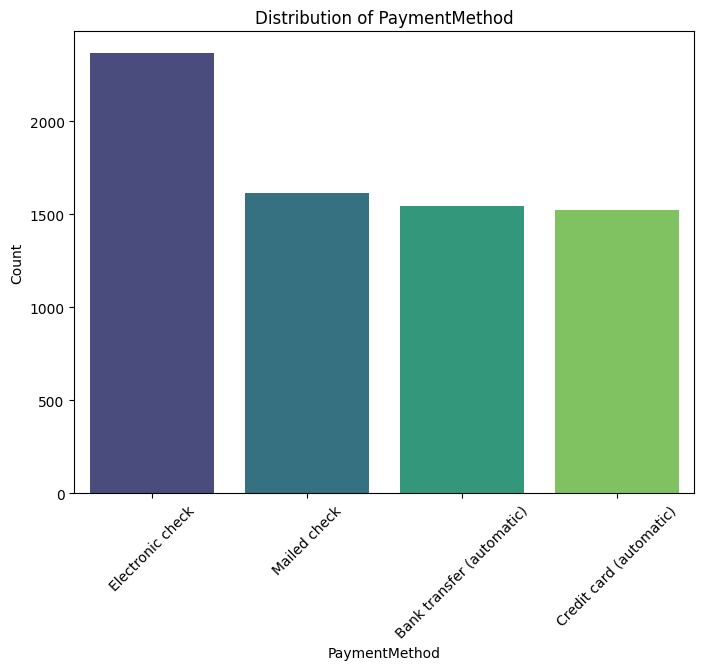

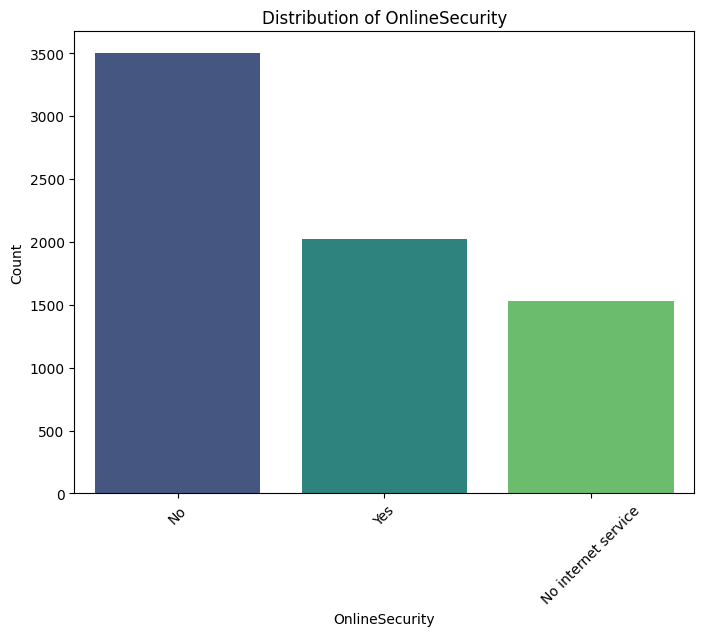

In [13]:
# Plot the distribution of categorical features
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

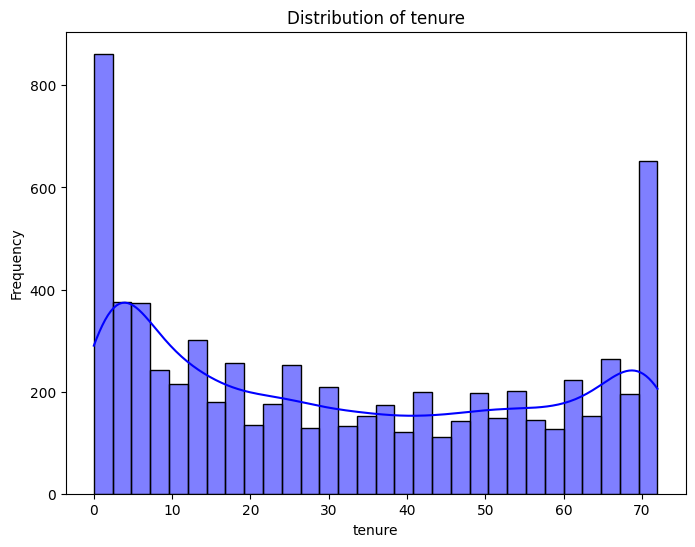

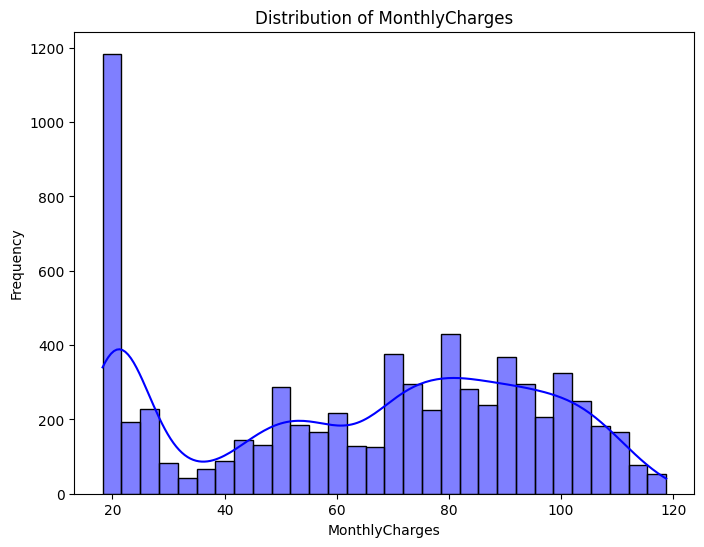

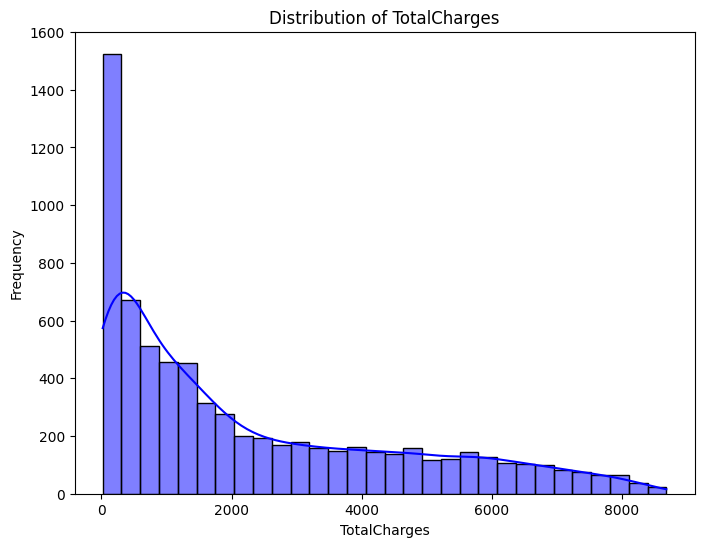

In [15]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


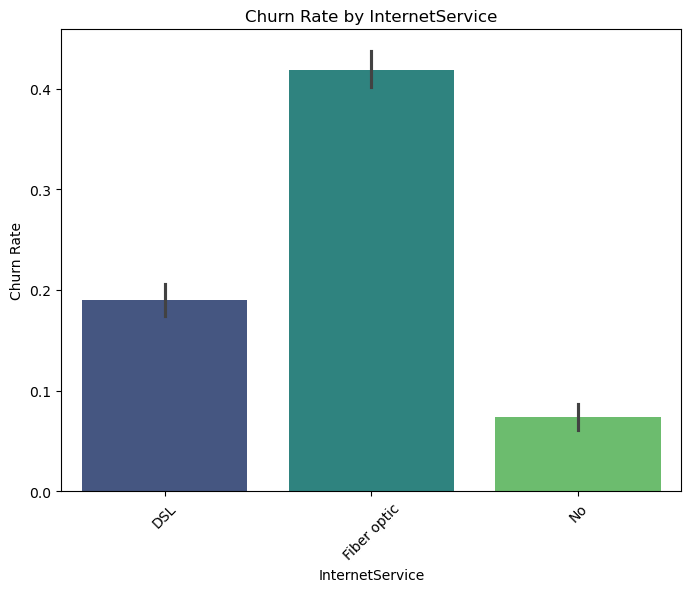

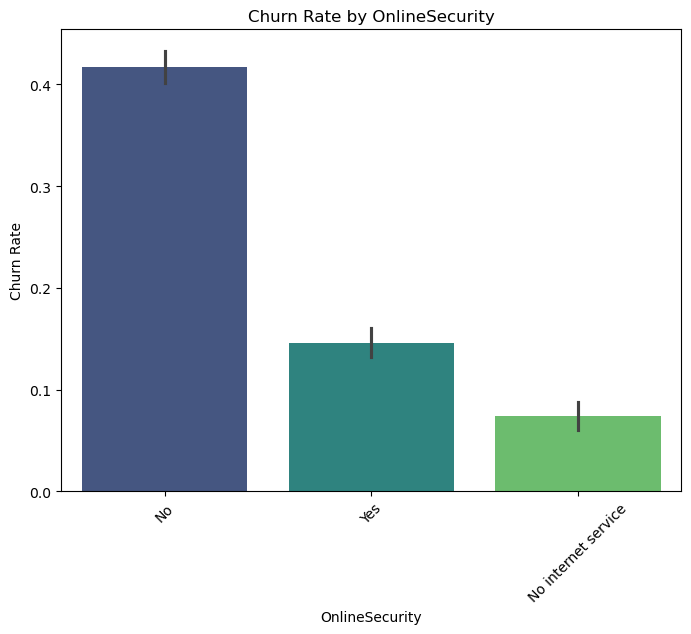

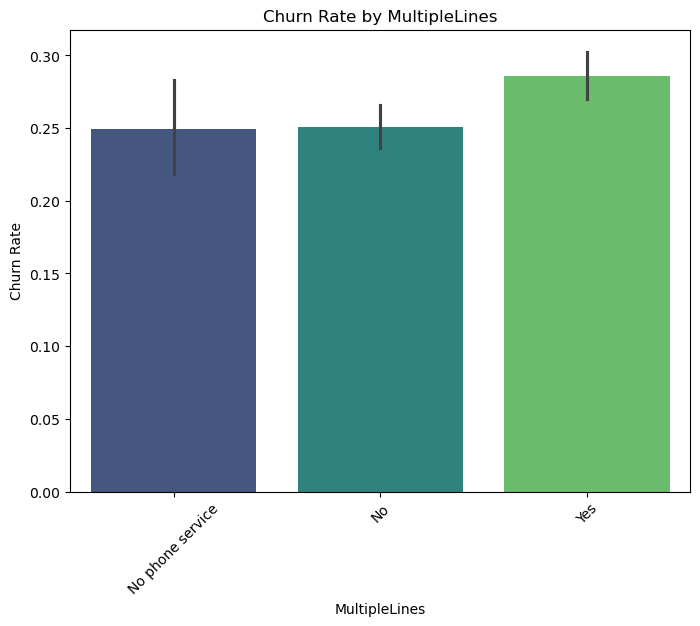

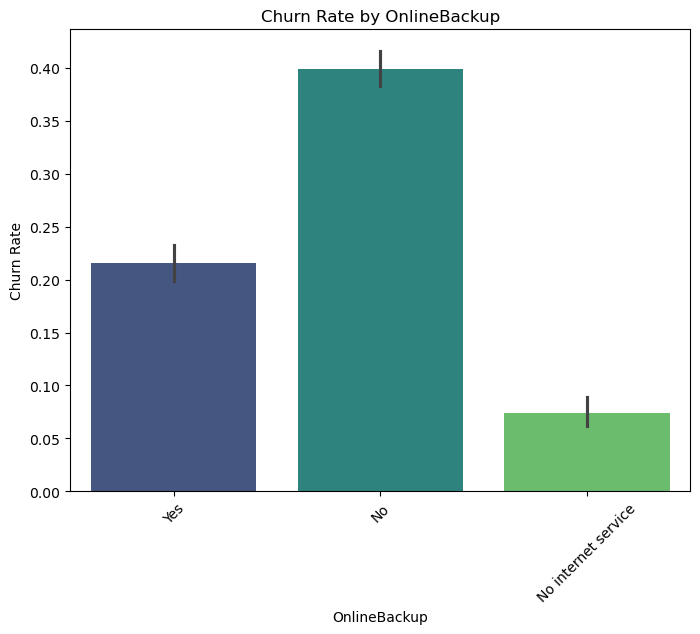

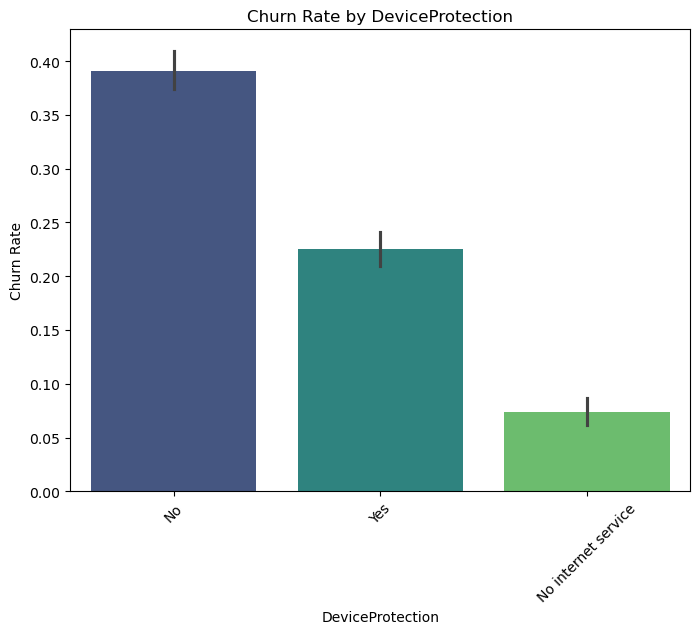

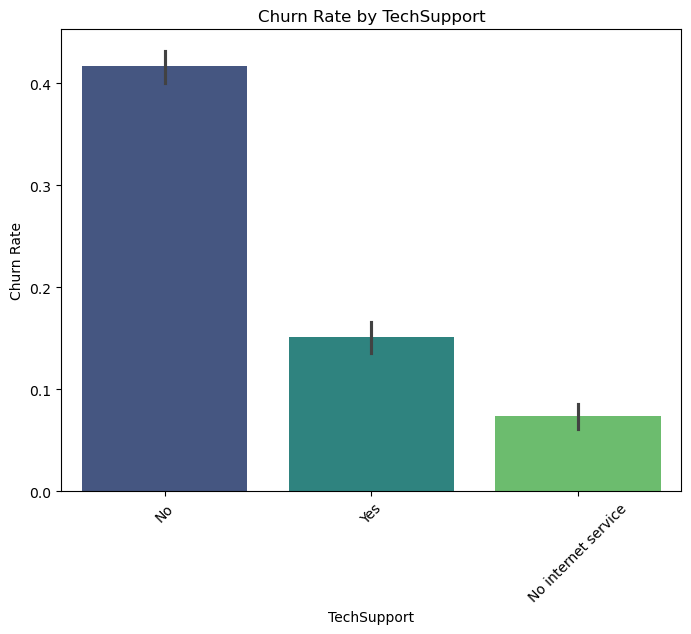

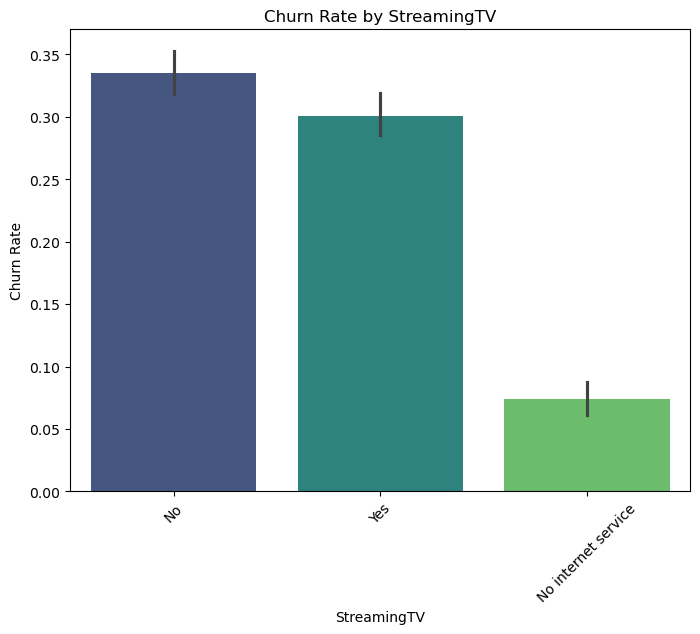

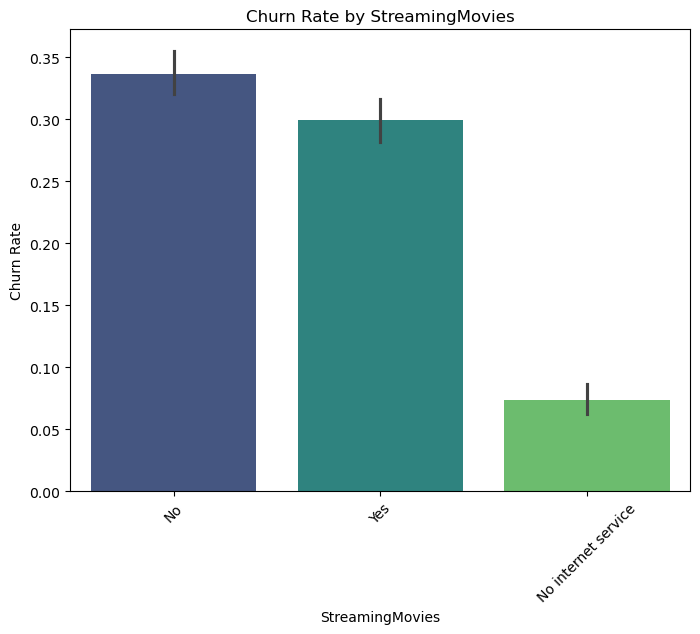

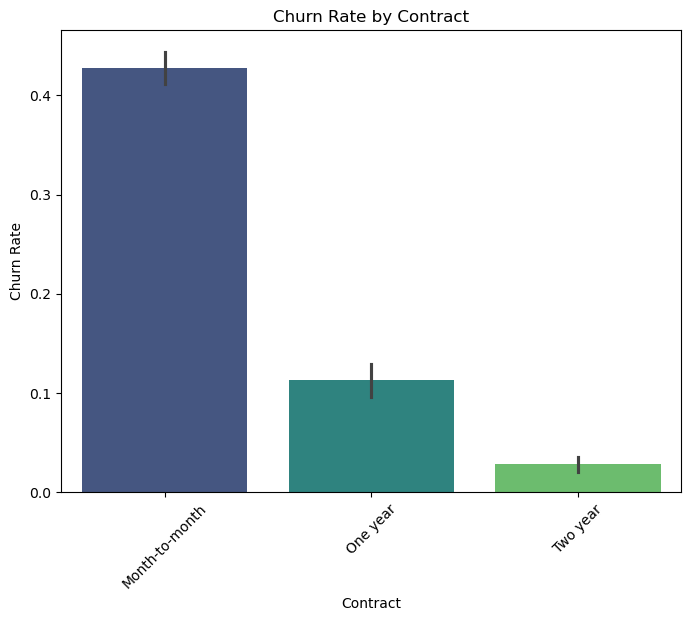

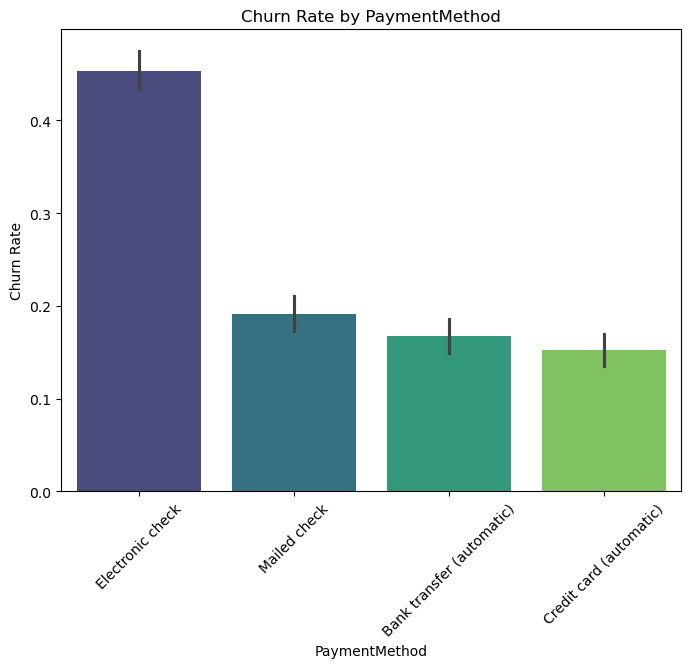

In [18]:
# Plot churn rates by categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=column, hue=column, y=data['Churn'].map({'Yes': 1, 'No': 0}), palette='viridis', legend=False)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
# Convert Churn column from Yes/No to Binary 0/1
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

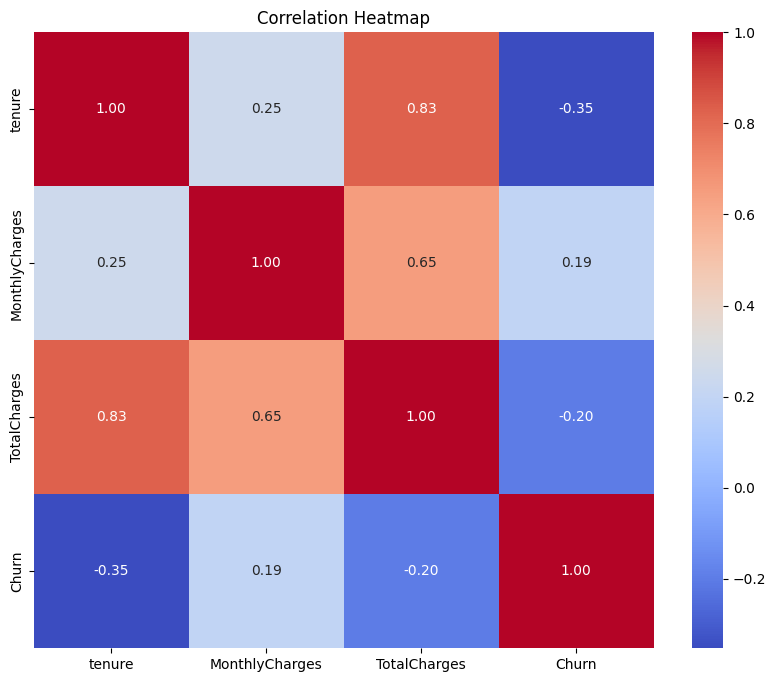

In [16]:
# Convert Churn to numerical for correlation
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = data[numerical_columns + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# One-Hot-Encoding

In [26]:
print(data.columns)
print(data.head())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...       

In [28]:
# Check the columns list
print("Columns list:")
print(columns)

# Compare with DataFrame columns
print("DataFrame columns:")
print(data.columns)

# Check if all `columns` are in `data`
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All columns are present in the DataFrame.")


Columns list:
['StreamingTV', 'gender', 'InternetService', 'Partner', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod', 'StreamingMovies', 'PhoneService', 'Dependents', 'MultipleLines', 'OnlineSecurity', 'PaperlessBilling', 'OnlineBackup']
DataFrame columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
All columns are present in the DataFrame.


In [ ]:
# Step 4: Remove the customerID column - we do not need this.
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

# Perform one-hot encoding

# Step 1: Convert 'gender' column to 0/1
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
print("(Gender) Data Frame columns:", data.columns)

# Step 2: Convert Yes/No columns to 0/1
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
print("Yes/No Data Frame columns:", data.columns)

# Step 3: One-hot encode categorical columns

# Function to generate one-hot mapping dynamically
def generate_one_hot_mapping(unique_values):
    mapping = {value: [1 if i == j else 0 for i in range(len(unique_values))]
               for j, value in enumerate(unique_values)}
    return mapping

for col in categorical_columns:
    # Generate the mapping dynamically
    unique_values = data[col].unique()  # Get unique values from the column
    one_hot_mapping = generate_one_hot_mapping(unique_values)
    # Replace string values with one-hot-encoded lists
    data[col] = data[col].map(one_hot_mapping)

# Step 4: Ensure all columns are numeric
# Convert all Boolean columns (True/False) to numeric (0/1)
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))

for col in data.columns:
    print('Column:', col, '\t', data[col].dtype)
    # print(df[col].unique())
    print() 

# Step 5: Verify that all columns are numeric
assert all(data.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number))), "Not all columns are numeric!"

# Note that Churn was converted to numeric in previous cells.

# Check the results
print(data.head())

(Gender) Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Yes/No Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Column: gender 	 int64

Column: SeniorCitizen 	 int64

Column: Partner 	 int64

Column: Dependents 	 int64

Column: tenure 	 int64

Column: PhoneService 	 int64

Column: MultipleLines 	 object

Column: Internet

C:\Users\alang\AppData\Local\Temp\ipykernel_69704\504565252.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))


AssertionError: Not all columns are numeric!

In [32]:
# Select non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')


In [34]:
print(data.head(10))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   
5       1              0        0           0       8             1   
6       0              0        0           1      22             1   
7       1              0        0           0      10             0   
8       1              0        1           0      28             1   
9       0              0        0           1      62             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0

In [36]:
df_X = data.drop(columns=['Churn'])
df_y = data['Churn']

# Convert dataframces to Numpy arrrays
X = df_X.to_numpy()
y = df_y.to_numpy()

In [38]:
print(data.head())
print()
print(df_X.head())
print()
print(df_y.head())
print()
print(X)
print()
print(y)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
2     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [1, 0, 0]        [1, 0, 0]   
3     [1, 0, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
4     [0, 1, 0]       [0, 1, 0]      [1, 0, 0]    [0, 1, 0]        [1, 0, 0]   

  TechSupport StreamingTV StreamingMovies   Contract  PaperlessBilling  \
0   [1, 0, 0]   [1

At this point the data frame should contain only numeric columns or columns that are categorical feature represented as binary vector atored in a Python list.

The next step is that you create Numpy arrays from this data. 

You then create the training examples. Typically the input features are stored in an array X and the target label, Churn, is stored in an array y.

You can use Scikit-learn to split the data randomly into training and testing.